In [12]:
import numpy as np
from numpy.polynomial.polynomial import polyvander2d
from numpy.linalg import lstsq
import matplotlib.pyplot as plt
import cv2

In [13]:
# Example: Load an image or create synthetic image data
# image_data = np.random.rand(100, 100) * 255  # Random grayscale image of size 100x100
corrupted_x, corrupted_y, corrupted_width, corrupted_height = 100, 100, 50, 50
image = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)  # Example image; replace with your actual image


# Define the region to exclude: e.g., a central square from (30, 30) to (70, 70)
x, y = np.indices(image.shape)
mask = (x < corrupted_x) | (x > corrupted_x + corrupted_width) | (y < corrupted_y) | (y > corrupted_y + corrupted_height)  # True outside the central square

# Apply the mask to flatten x, y, and image data
x_flat = x[mask]
y_flat = y[mask]
z_flat = image[mask]

# Generate the Vandermonde matrix for a polynomial of degree 2 (can be adjusted)
degree_x, degree_y = 50,50 
vander2d_matrix = polyvander2d(x_flat, y_flat, [degree_x, degree_y])
vander2d_flat = vander2d_matrix.reshape(len(z_flat), -1)

# Solve the least squares problem
coefficients, residuals, rank, s = lstsq(vander2d_flat, z_flat)

# Use coefficients to evaluate the polynomial on the whole grid
coeff_matrix = coefficients.reshape((degree_x + 1, degree_y + 1))
fitted_values = np.polynomial.polynomial.polyval2d(x, y, coeff_matrix)

C:\Users\Alex\AppData\Local\Temp\ipykernel_26968\4274014410.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coefficients, residuals, rank, s = lstsq(vander2d_flat, z_flat)


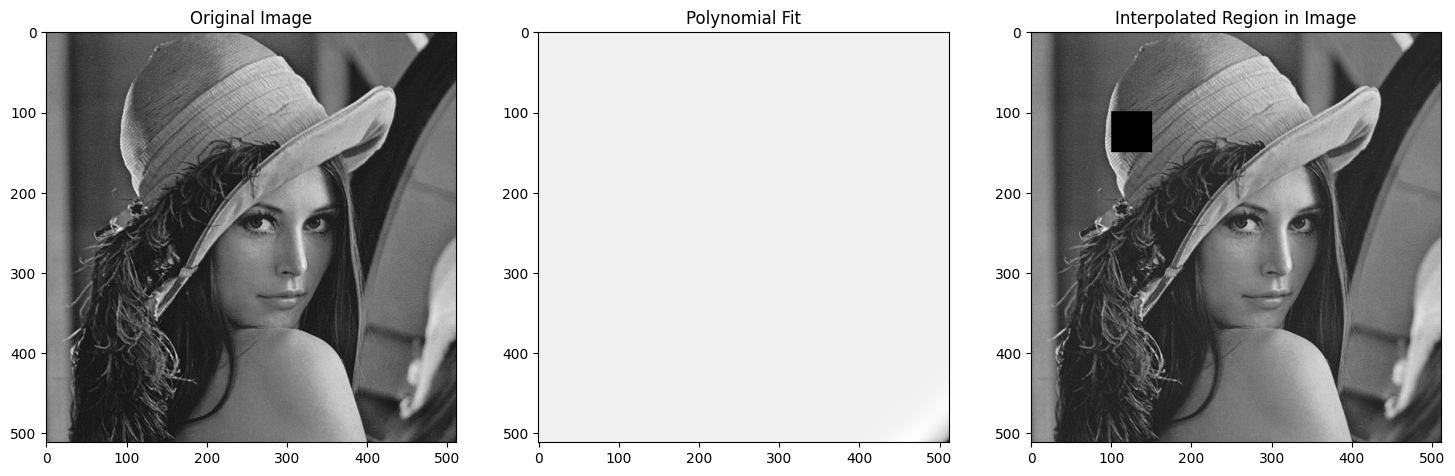

In [14]:
# Create a copy of the original image to modify
interpolated_image = np.copy(image)
interpolated_image[~mask] = fitted_values[~mask]

# Display the original, fitted polynomial, and modified image with interpolated region
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(fitted_values, cmap='gray')
plt.title('Polynomial Fit')
plt.subplot(1, 3, 3)
plt.imshow(interpolated_image, cmap='gray')
plt.title('Interpolated Region in Image')
plt.show()